In [ ]:
# Assignment: Count Most Frequently used words in Veidenbaums.txt
# For English let's use Alice in Wonderland

In [ ]:
# Open File - Get Data
# Read Text
# Split Text into word tokens
# Count these tokens (we need to figure out how to)
# Save/Print Results

In [ ]:
# File is under /data/Veidenbaums.txt
# Alice is under /data/Alice_Wonderland.txt
# we are under /TextProcessing/CountingWords.ipynb

In [ ]:
# This means one level up and then again down into data
# "../data/Veidenbaums.txt"
# So called relative path


In [1]:
import os
current_path = os.getcwd()
current_path

'/content'

In [3]:
from pathlib import Path
files = list([f for f in Path("./").glob("*.txt")])
files

[PosixPath('Alice_Wonderland.txt')]

In [5]:
# filePath = "../data/Veidenbaums.txt"
# .. means one level up
# data folder is a sibling of TextProcessing
# filePath = "../data/Alice_Wonderland.txt"
filePath = "Alice_Wonderland.txt" # this is relative to your current working directory
# with is so called context manager
# it will automatically close the file - otherwise you need to do it manually - which everyone forgets to do :)
# with open(filePath, encoding="utf-8") as fstream: # openign a filestream
with open("Alice_Wonderland.txt", encoding="utf-8") as fstream: # openign a filestream
    mytext = fstream.read() # here our textual data is read into memory
    # as with most things in Python after : you need to indent
    # fstream is still open here
    # there are other ways to read files - but this is the most common one
    # who said that you can't step into the same river twice?
    # you can - but it will be a different river
    # which Greek philosopher said that?
    # Heraclitus - one of the pre-Socratics
    # with file streams we can reset the pointer to the beginning of the file
    # fstream.seek(0) - rare that you would need to do this
    # usually you read the file once and then do something with it - like count words
    # you do not need to read the file again - maybe you will want to write it again but that is a different story
# once indentation ends here fstream is closed automatically for you
len(mytext) # how many symbols are in our text

164410

In [6]:
with open("sample_data/README.md", encoding="utf-8") as file_stream:
    readme_text = file_stream.read() # so reads all of it into memory
    # file_stream is still open but completely read here
# here file is closed completely
print(readme_text)

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).



In [14]:
mytext[:120] # first 120 symbols from our text

'\ufeffThe Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone '

In [15]:
mytext[-200:] # last two hundred symbols of our text

'-tm,\nincluding how to make donations to the Project Gutenberg Literary\nArchive Foundation, how to help produce our new eBooks, and how to\nsubscribe to our email newsletter to hear about new eBooks.\n\n\n'

In [16]:
print(mytext[:300]) # print first 300 symbols
# print gives your more human readable output than just typing the variable name - which is more suitable for debugging

﻿The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms o


In [ ]:
# so one issue is that pretty much any data source will need additional cleaning
# here we have header and footer sections with some legal data
# this meta-data would distort our analysis
# for one we would get mentions of Mr. Gutenberg
# which Mr. Lewis Carrol did not intend


In [17]:
# type of mytext is string
type(mytext)

str

In [18]:
# so we need to do some cleaning first
# ideas on getting rid of header and footer sections
#
mytext.index("End of Project Gutenberg")
#this will the index of the first mention of the string

145459

In [19]:
len(mytext)

164410

In [ ]:
# so there are about 17000 symbols between the end of the book and the end of the file
# we can use this to get rid of the footer
# we can also use this to get rid of the header


In [24]:
mytext.index("NotEnd of Project Gutenberg") # raises Error

ValueError: ignored

In [23]:
mytext.find("NotEnd of Project Gutenberg") # gives you -1

-1

In [25]:
# so cleanend will be a new string containing only the text of the book from the start of the book to the end of the book
# we use slicing to get the text we want
cleanend = mytext[:mytext.find("End of Project Gutenberg")]
# cleanend = mytext[:mytext.index("End of Project Gutenberg")] # would raise error if not found

# of course this assumes we know the sentinel value for our end of the book
# so this will cut and save text to last character
# before the above text is found
len(cleanend)

145459

In [26]:
print(cleanend[-200:]) # last 200 characters

of Wonderland of long ago: and how she
would feel with all their simple sorrows, and find a pleasure in all
their simple joys, remembering her own child-life, and the happy summer
days.

THE END 







In [28]:
# first we find out where the header ends
start_index = cleanend.index("START OF THIS PROJECT GUTENBERG EBOOK")
start_index

729

In [30]:
# we also need to know how many characters to skip
skip = len("START OF THIS PROJECT GUTENBERG EBOOK")
skip

37

In [31]:
cleanall = cleanend[start_index+skip:] # so we want everything from the index+skip
print(cleanall[:250]) # print first 250 characters of our cleaned text

 ALICE’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER 


In [32]:
cleanall.count("Illustration")

1

In [33]:
#reallyclean = cleanall[cleanall.find("Illustration")+len("Illustration")]
def cut_off_start(text, sentinel):
    if sentinel not in text:
        print(f"nothing to do no {sentinel} found!")
        return text # nothing to do
    start = text.find(sentinel)
    skip = len(sentinel)
    new_text = text[start+skip:] # so new text is everything after start + skip number of characters
    return new_text


In [34]:
really_clean_text = cut_off_start(cleanall, "Illustration")
len(really_clean_text)

144593

In [37]:
# remember strip method on strings, let's get rid of any whitespace in beginning and end
trimmed_text = really_clean_text.strip()
len(trimmed_text)

144587

In [38]:
# i will open/create a new file with name Alice_cleaned.txt
# notice it is in the same folder as current notebook
# mode is w - which means write
# encoding is utf-8 - we might have some non-ascii characters
# file_out is arbitrary name for our filestream object
with open('Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(trimmed_text)
# so this recipe will create/overwrite 'Alice_clean.txt'
# using utf-8 encoding
# will write ALL of the text that is in trimmed_text variable

In [ ]:
# i could also save the file in a different folder in this case like data which is our sibling folder
with open('../data/Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(cleanall)
# so this recipe will create/overwrite 'Alice_clean.txt' in data
# using utf-8 encoding
# will write ALL of the text that is in cleanall variable

In [39]:
# how to create a folder if it does not exist?
# we can use pathlib
# pathlib is a new module in Python 3
# it is a bit more advanced than os

# we can use pathlib to create a folder if it does not exist
# we can also use it to check if a folder exists

# from pathlib import Path # import Path from pathlib module need to import only once
# we can create a path object

# create folder my_folder if it does not exist
Path("my_folder").mkdir(exist_ok=True) # exist_ok=True means do not throw an error if folder exists
# in this case it will be a child folder of current folderb
# next time i run it it will not throw an error

In [40]:
# so this is how I would copy the same data into a folder and then file name
with open('my_folder/Alice_clean.txt', mode="w", encoding="utf-8") as file_out:
    file_out.write(cleanall)

In [ ]:
# lets pretend i do not have cleanall in memory
# i can load text from my clean file
# mode r is read which is default so not really needed
with open('../data/Alice_clean.txt', mode="r", encoding="utf-8") as file:
    # mytext = file.read() # so reads everything
    # alterantively we can read line by line
    # this is useful if we have a very large file
    # we can read line by line and process it
    text_lines = file.readlines() # this will read all lines into a list
# print first 10 lines
print(text_lines[:20])

[' ALICE’S ADVENTURES IN WONDERLAND ***\n', '\n', '\n', '\n', 'Produced by Arthur DiBianca and David Widger\n', '\n', '[Illustration]\n', '\n', '\n', '\n', '\n', 'Alice’s Adventures in Wonderland\n', '\n', 'by Lewis Carroll\n', '\n', 'THE MILLENNIUM FULCRUM EDITION 3.0\n', '\n', 'Contents\n', '\n', ' CHAPTER I.     Down the Rabbit-Hole\n']


In [ ]:
# so let's see about tokenization
# one is to use split using white space

In [ ]:
mysentence = "A quick brown fox    jumped \t over the   \n \n sleepy dog"
# we have some newlines and some tabs in our sentence
print(mysentence)

A quick brown fox    jumped 	 over the   
 
 sleepy dog


In [ ]:
# Python string has a split method which will split a string into a list of strings
mysentence.split()  # so we split by white space, including newlines and tabs
# you can consider split a type of tokenization

['A', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'sleepy', 'dog']

In [ ]:
mysentence.split(" ") # so we split by single white space, this might not be what we want

['A',
 'quick',
 'brown',
 'fox',
 '',
 '',
 '',
 'jumped',
 '\t',
 'over',
 'the',
 '',
 '',
 '\n',
 '\n',
 'sleepy',
 'dog']

In [ ]:
# we could try splitting already but we will get dirty data(words)
mywords = cleanall.split() # so any white space will be a delimiter
len(mywords)

26537

In [ ]:
mywords[:25]

['ALICE’S',
 'ADVENTURES',
 'IN',
 'WONDERLAND',
 '***',
 'Produced',
 'by',
 'Arthur',
 'DiBianca',
 'and',
 'David',
 'Widger',
 '[Illustration]',
 'Alice’s',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'THE',
 'MILLENNIUM',
 'FULCRUM',
 'EDITION',
 '3.0']

In [ ]:
# so we need to get rid of some \n which split did not
# so how could we do this?
# replace to rescue!


In [ ]:
clean_text = mytext.replace("\n", " ") # why not nothing ""?
# replacing with "" we run the risk of combining words across lines
clean_text[:100]

' ALICE’S ADVENTURES IN WONDERLAND ***    Produced by Arthur DiBianca and David Widger  [Illustration'

In [ ]:
# remember replace is a string method it returns a new string
# so we need to assign it to a variable
# we can use it to replace multiple characters or strings
# we can also use it to replace with nothing

# for example
bob_adventures = cleanall.replace("ALICE", "BOB").replace("Alice", "Bob")
# so for example we can replace all mentions of Alice with Bob
print(bob_adventures[:100])

 BOB’S ADVENTURES IN WONDERLAND ***



Produced by Arthur DiBianca and David Widger

[Illustration]



In [ ]:
# count Bob
bob_adventures.count("Bob")

399

In [ ]:
len(cleanall)-len(bob_adventures) # so we have lost some characters

800

In [ ]:
# TODO
# before we split we might want to normalize our text - make it all lower case
# we also might want to remove punctuation
# we can use string.punctuation to get a list of punctuation symbols
# also we can use string.whitespace to get a list of whitespace symbols

In [ ]:
# normalize to lower case
alice_lower = cleanall.lower()
print(alice_lower[:100])
# idea is to make all words lower case so that we do not count the same word twice
# with lowercase you should be aware of some issues
# for example in English we have words like "I" and "i"
# in Latvia we have city Ogre and ogre the mythical creature

 alice’s adventures in wonderland ***



produced by arthur dibianca and david widger

[illustration


In [ ]:
# next step is usually to remove punctuation
# we can use string.punctuation to get a list of punctuation symbols
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# i can make my own string of punctuation symbols
my_punctuation = string.punctuation + "“”‘’*"
print(my_punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”‘’*


In [ ]:
# now we want to remove all symbols in my_punctuation from alice_lower
# we can use translate method
# we need to create a translation table
# we can use maketrans method
# we need to pass 3 arguments
# first is a string of characters we want to replace
# second is a string of characters we want to replace with
# third is a string of characters we want to remove
# so we want to replace all punctuation with nothing
# we also want to remove all newlines

# so we can create a translation table

# translation_table = str.maketrans(my_punctuation, " "*len(my_punctuation), "\n")
translation_table = str.maketrans(my_punctuation, " "*len(my_punctuation), "")
# use the translation table to translate alice_lower
alice_clean_no_punct = alice_lower.translate(translation_table)
print(alice_clean_no_punct[:100])

 alice s adventures in wonderland    



produced by arthur dibianca and david widger

 illustration


In [ ]:
# for loops let us iterate over a sequence
for my_char in "Valdis":
    print(my_char)

V
a
l
d
i
s


In [ ]:
# similarly we can iterate any sequence
for my_number in [1,2,3,4,5]:
    print(my_number)

1
2
3
4
5


In [ ]:
for bad_char in my_punctuation:
    print(f"Replacing {bad_char} with nothing")

Replacing ! with nothing
Replacing " with nothing
Replacing # with nothing
Replacing $ with nothing
Replacing % with nothing
Replacing & with nothing
Replacing ' with nothing
Replacing ( with nothing
Replacing ) with nothing
Replacing * with nothing
Replacing + with nothing
Replacing , with nothing
Replacing - with nothing
Replacing . with nothing
Replacing / with nothing
Replacing : with nothing
Replacing ; with nothing
Replacing < with nothing
Replacing = with nothing
Replacing > with nothing
Replacing ? with nothing
Replacing @ with nothing
Replacing [ with nothing
Replacing \ with nothing
Replacing ] with nothing
Replacing ^ with nothing
Replacing _ with nothing
Replacing ` with nothing
Replacing { with nothing
Replacing | with nothing
Replacing } with nothing
Replacing ~ with nothing
Replacing “ with nothing
Replacing ” with nothing
Replacing ‘ with nothing
Replacing ’ with nothing


In [ ]:
# instead we can use a loop
# we can use a loop to remove all punctuation

# we go through each symbol in my_punctuation and replace it with nothing in alice_lower
REPLACE_CHAR = " " # you can change this to "" if you want to remove punctuation with nothing
alice_clean_no_punct = alice_lower # we need to start with an alice_lower
for symbol in my_punctuation:
    print(f"Replacing {symbol} with {REPLACE_CHAR}")
    alice_clean_no_punct = alice_clean_no_punct.replace(symbol, REPLACE_CHAR)
print(f"After cleaning we have {len(alice_clean_no_punct)} characters")

Replacing ! with  
Replacing " with  
Replacing # with  
Replacing $ with  
Replacing % with  
Replacing & with  
Replacing ' with  
Replacing ( with  
Replacing ) with  
Replacing * with  
Replacing + with  
Replacing , with  
Replacing - with  
Replacing . with  
Replacing / with  
Replacing : with  
Replacing ; with  
Replacing < with  
Replacing = with  
Replacing > with  
Replacing ? with  
Replacing @ with  
Replacing [ with  
Replacing \ with  
Replacing ] with  
Replacing ^ with  
Replacing _ with  
Replacing ` with  
Replacing { with  
Replacing | with  
Replacing } with  
Replacing ~ with  
Replacing “ with  
Replacing ” with  
Replacing ‘ with  
Replacing ’ with  
Replacing * with  
After cleaning we have 144693 characters


In [ ]:
alice_clean_no_punct.find("*")

34

In [ ]:
# we could also remove all stop words
# stop words are words that do not add much meaning to the text
# for now we will leave them in

In [ ]:
# we can finally split
alice_words = alice_clean_no_punct.split()
print(f"We have {len(alice_words)} words")

We have 27337 words


In [ ]:
# alice_words is a list of strings
# we can use list methods to work with it
# we could count how many times each word appears
alice_words.count("alice") # 400 because ALICE and Alice merged into alice

400

In [ ]:
# here we could do additionalal cleaning by checking for maybe bad words
# bad characters
# unneeded words such stop words , meaning words which do not contribute to the meaning


In [ ]:
# so how could we count the occurences of each word?
# we could use something like a dictionary with words being keys and value being
# number of occurences

In [ ]:

word_dict = {} # {} is an empty dictionary
# what is a dictionary?
# a dictionary is a collection of key value pairs
# each key is unique - usually a string or number(less common)
# key idea is that we have near instant access to the value by key
# values can be repeated
# so we will loop/iterate over all words in alice_words
# we will check if the word is in the dictionary
# if it is we will increment the value by 1
# if it is not we will add it to the dictionary with value 1

for word in alice_words:
    if word in word_dict.keys():
        word_dict[word] += 1 # increase count for each occurence
    else:
        word_dict[word] = 1 # so first occurence you count as 1
    # below is just a shorter version of the above
#     word_dict[word] = word_dict.get(word, 0) + 1
list(word_dict.items())[:20]

[('alice', 400),
 ('s', 203),
 ('adventures', 7),
 ('in', 370),
 ('wonderland', 4),
 ('produced', 2),
 ('by', 59),
 ('arthur', 1),
 ('dibianca', 1),
 ('and', 852),
 ('david', 1),
 ('widger', 1),
 ('illustration', 1),
 ('lewis', 1),
 ('carroll', 1),
 ('the', 1643),
 ('millennium', 1),
 ('fulcrum', 1),
 ('edition', 1),
 ('3', 1)]

In [ ]:
# since counting is so common we can use Counter from collections
# you do not have to write loops yourself :)
from collections import Counter # python already provides counter!
word_count = Counter(alice_words) # give a list of tokens
word_count.most_common(25) # and you can get results immediately

[('the', 1643),
 ('and', 852),
 ('to', 724),
 ('a', 632),
 ('it', 588),
 ('she', 550),
 ('i', 534),
 ('of', 512),
 ('said', 459),
 ('you', 405),
 ('alice', 400),
 ('in', 370),
 ('was', 357),
 ('that', 311),
 ('as', 261),
 ('her', 248),
 ('t', 218),
 ('at', 209),
 ('s', 203),
 ('on', 193),
 ('with', 181),
 ('all', 180),
 ('had', 178),
 ('but', 163),
 ('for', 152)]

In [ ]:
# how about most common words that are 4 letters or more?
# we can use a list comprehension
# list comprehension is a way to create a list from another list
# we can use it to filter out words that are too short
# we can also use it to convert all words to lower case
# we can also use it to remove stop words

# we can use a list comprehension to create a list of words that are 4 letters or more
alice_4plus = [word for word in alice_words if len(word) >= 4]
print(f"We have {len(alice_4plus)} words that are 4 letters or more")

We have 14236 words that are 4 letters or more


In [ ]:
# alternative would be to use a for loop
alice_4plus = [] # create an empty list
for word in alice_words:
    if len(word) >= 4:
        alice_4plus.append(word) # add word to the list
# same result but more code
# advantage of list comprehension is that it is more compact
# advantage of loop is that you can add more code inside the loop

In [ ]:
# count the most common words
alice_4plus_count = Counter(alice_4plus)
alice_4plus_count.most_common(25)   # still a lot of stop words at least we have removed punctuation

[('said', 459),
 ('alice', 400),
 ('that', 311),
 ('with', 181),
 ('they', 149),
 ('very', 144),
 ('what', 141),
 ('this', 134),
 ('little', 129),
 ('down', 102),
 ('there', 99),
 ('about', 94),
 ('then', 92),
 ('like', 85),
 ('were', 85),
 ('would', 83),
 ('went', 83),
 ('herself', 83),
 ('them', 83),
 ('again', 82),
 ('know', 81),
 ('have', 80),
 ('when', 79),
 ('could', 77),
 ('queen', 76)]

In [ ]:
# so Counters are dictionaries with benefits as I like to say
# we can use them to get most common words




In [ ]:
# lets save all of the counter as a tsv file starting with most common
# we can use a with statement to open a file
# of course we could use another format like csv or json - json will be covered later

# will save in current directory
with open("alice_word_count.tsv", "w", encoding="utf-8") as f:
    # first lets write a header
    f.write("word\tcount\n") # \t is a tab character, \n is a newline
    # we go through all words and counts in alice_4plus_count starting with most common
    for word, count in alice_4plus_count.most_common():
        # then we write each word and count to the file
        f.write(f"{word}\t{count}\n")

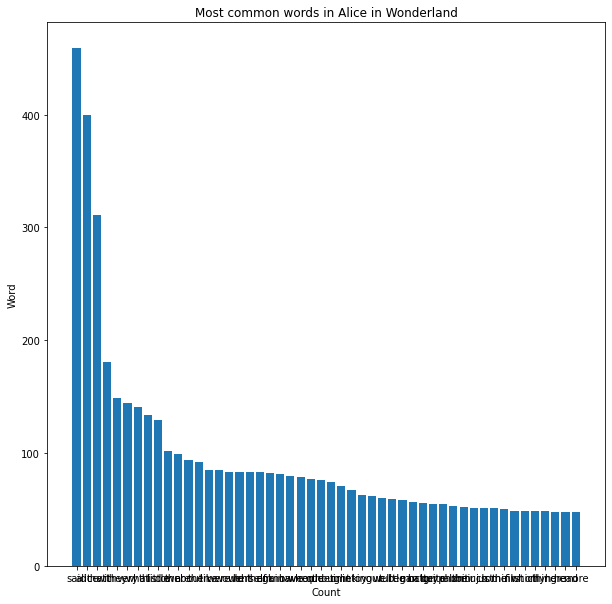

In [ ]:
# lets plot most common 50 words and their counts

# we can use matplotlib to plot

import matplotlib.pyplot as plt

# we can use a list comprehension to get the counts and words separately
counts = [count for word, count in alice_4plus_count.most_common(50)]
words = [word for word, count in alice_4plus_count.most_common(50)]

# alternative would be to use a for loop
# counts = []
# words = []
# for word, count in alice_4plus_count.most_common(50):
#     counts.append(count)
#     words.append(word)

# now we can plot

plt.figure(figsize=(10,10)) # we can set the size of the figure
plt.bar(words, counts) # vertical bar chart
# add title and labels
plt.title("Most common words in Alice in Wonderland")
plt.xlabel("Count")
plt.ylabel("Word")

plt.show()

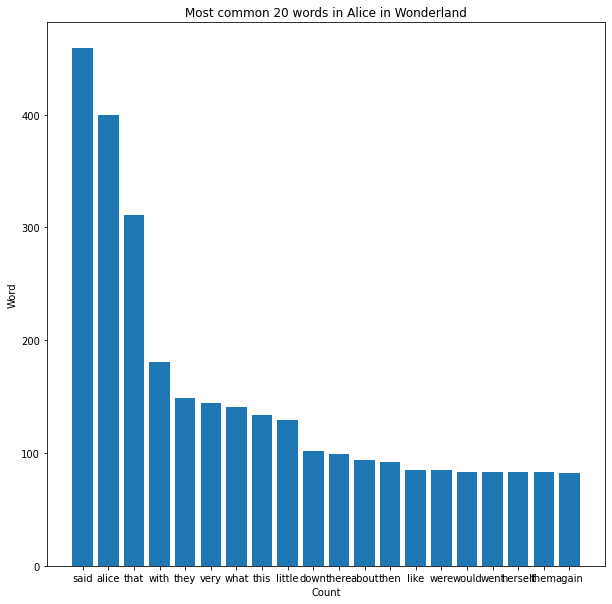

In [ ]:
# plot top 20 words and their counts
TOP_COUNT = 20
plt.figure(figsize=(10,10)) # we can set the size of the figure
plt.bar(words[:TOP_COUNT], counts[:TOP_COUNT]) # vertical bar chart
# add title and labels
plt.title(f"Most common {TOP_COUNT} words in Alice in Wonderland")
plt.xlabel("Count")
plt.ylabel("Word")

plt.show()

In [ ]:
# looks like Zipf's law is holding up
# link to wikipedia https://en.wikipedia.org/wiki/Zipf%27s_law

In [ ]:
type(alice_4plus_count.most_common())

list

In [ ]:
# most common returns a list of tuples
# what is a tuple?
# a tuple is a list that is immutable
# you can not change the values in a tuple, you can not add or remove values
# so list of tuples is roughly analogous to a 2D array

In [ ]:
# so now that we have some prelimenary results in
# we could start thinking about stripping stopwords
# maybe getting rid of very short words

In [ ]:
word_count["she"] # turns out Counter is just a dictionary with some benefits

485

In [ ]:
word_count["he"]

94

In [ ]:
import csv

In [ ]:
with open("word_count.tsv", mode="w", encoding="utf-8") as f:
    f.write("word\tcount\n") # so we add newlines by hand
    for word,count in word_count.most_common():
        f.write(f"{word}\t{count}\n")

In [ ]:
# we can use libraries such as CSV and Pandas to take care of writing
#

In [ ]:
# to continue we will need to perform some additional cleaning
# maybe think about some visualization of some of this data

In [ ]:
# we will need to clean all lines which contain *** as ending characters
# so lets try reading lines
# filePath = "../data/Veidenbaums.txt"
# with open(filePath, encoding="utf-8") as fstream:
#     mylines = fstream.readlines()
# len(mylines)

In [ ]:
mylines[:15]

In [ ]:
cleanlines = [line for line in mylines if line[0]!='\n']
len(cleanlines)

In [ ]:
cleanlines[:5]

In [ ]:
# we do not want the lines which end with ***\n
headlines = [line for line in cleanlines if line.endswith("***\n")]
headlines[:5]
# we do not need the headlines!

In [ ]:
# we do not want the lines which end with ***\n
noheadlines = [line for line in cleanlines if not line.endswith("***\n")]
noheadlines[:5]

In [ ]:
# we could save the results
savePath = "../data/noHeadVeidenbaums.txt"
with open(savePath, mode="w", encoding="utf-8") as fstream:
    fstream.writelines(noheadlines)

In [ ]:
# May 6th lets start with noheadlines
myPath = "../data/noHeadVeidenbaums.txt"
with open(myPath, encoding="utf-8") as fstream:
    noheadlines = fstream.readlines()
len(noheadlines)

366

In [ ]:
#
noheadlines = [line for line in noheadlines if not "Treimanim" in line]
len(noheadlines)

365

In [ ]:
spaceChars = "\n-"
stopChars = """!?.,"':;()…"""


In [ ]:
for char in stopChars:
    print(char)

In [ ]:
# One big text from many lines
textNoHead = "".join(noheadlines) # we could have used fstream.read earlier
textNoHead[:55]

'Pēc ideāliem cenšas lielie gari,\nBet dzīvē ieņemt vietu'

In [ ]:
# take off spacy Characters replace with space (why space ? :)
for char in spaceChars:
    print(f"Replacing {char} with space")
    textNoHead = textNoHead.replace(char, " ")
#     print(textNoHead[:75])
textNoHead[:75]

Replacing 
 with space
Replacing - with space


'Pēc ideāliem cenšas lielie gari, Bet dzīvē ieņemt vietu pirmie Tie neiespēj'

In [ ]:
for char in stopChars:
    print(f"Replacing {char} with nothing")
    textNoHead = textNoHead.replace(char, "")
textNoHead[:55]

Replacing ! with nothing
Replacing ? with nothing
Replacing . with nothing
Replacing , with nothing
Replacing " with nothing
Replacing ' with nothing
Replacing : with nothing
Replacing ; with nothing
Replacing ( with nothing
Replacing ) with nothing
Replacing … with nothing


'Pēc ideāliem cenšas lielie gari Bet dzīvē ieņemt vietu '

In [ ]:
savePath = "../data/noHeadVeidenbaumsOneLine.txt"
with open(savePath, mode="w", encoding="utf-8") as fstream:
    fstream.write(textNoHead)

In [ ]:
textNoHead.index("Vēstule")
# nothing found thats good

ValueError: substring not found

In [ ]:
textNoHead[5400:5430]

'eiz zaļoja jaunība cerības pla'

In [ ]:
# charSet that's Camelcase another style
char_set = set(textNoHead)
char_set

{' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'G',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'z',
 'Ā',
 'ā',
 'č',
 'Ē',
 'ē',
 'ģ',
 'Ī',
 'ī',
 'ķ',
 'ļ',
 'ņ',
 'Š',
 'š',
 'ū',
 'ž'}

In [ ]:
ord("…")

8230

In [ ]:
words = textNoHead.split()
words[:5]

['Pēc', 'ideāliem', 'cenšas', 'lielie', 'gari']

In [ ]:
# we need to convert to lower case
# for word in words:
words_lower = [word.lower() for word in words]
words_lower[:5]


['pēc', 'ideāliem', 'cenšas', 'lielie', 'gari']

In [ ]:
len(words_lower)

1865

In [ ]:
# if we want to do it ourselves
# we could store it in a dictionary word and count
# {'pēc':5, 'ideālie':1, 'cenšas':3}

In [ ]:
unique_words = set(words_lower)
len(unique_words)

1064

In [ ]:
# i create a dictionary of unique words and set counter to 0
my_counter_dict = {word:0 for word in list(unique_words)}
my_counter_dict['pēc']

0

In [ ]:
for word in words_lower:
    my_counter_dict[word] += 1 # each time i add 1 to right box(key)

In [ ]:
my_counter_dict['pēc']

11

In [ ]:
my_list_tuples = [(key, value) for key,value in my_counter_dict.items()]
my_list_tuples[:5]

[('apkakli', 1), ('šūpulis', 1), ('aša', 1), ('līdz', 8), ('tiesas', 1)]

In [ ]:
sorted(my_list_tuples)[:5]
# not quite what we need because it sorts by the first item alphabetically

[('acs', 1), ('agrāk', 1), ('aiz', 1), ('aizgāja', 1), ('aizmirsts', 1)]

In [ ]:
# solution we pass a function to show how to sort
my_most_common = sorted(my_list_tuples,key=lambda mytuple: mytuple[1], reverse=True)
my_most_common[:10]

[('un', 76),
 ('ir', 24),
 ('vēl', 22),
 ('tu', 21),
 ('tik', 21),
 ('bet', 15),
 ('kas', 15),
 ('nav', 14),
 ('man', 14),
 ('kā', 13)]

In [ ]:
# so sorting is possible but my recommendation is to use Counter

In [ ]:
# well and now I would to like sort
# its possible then I need to create a list from dictionary and then sort by key value
# solution use a library

In [ ]:
# Batteries are included no need to write our own counter
from collections import Counter

In [ ]:
mycounter = Counter(words_lower)


In [ ]:
mycounter.most_common(10)

[('un', 76),
 ('ir', 24),
 ('vēl', 22),
 ('tik', 21),
 ('tu', 21),
 ('bet', 15),
 ('kas', 15),
 ('nav', 14),
 ('man', 14),
 ('par', 13)]

In [ ]:
type(mycounter.most_common(10))

list

In [ ]:
# how to get only words 4 chars or longer ? :)
long_words = [word for word in words_lower if len(word) >= 4 ]
len(long_words)

1283

In [ ]:
long_counter = Counter(long_words)
long_counter.most_common(10)

[('reiz', 10),
 ('viss', 9),
 ('līdz', 8),
 ('mums', 7),
 ('sauc', 6),
 ('gars', 6),
 ('projām', 6),
 ('laiks', 5),
 ('sirds', 5),
 ('tomēr', 5)]

In [ ]:
'alus' in long_counter

True

In [ ]:
type(long_counter)

collections.Counter

In [ ]:
long_counter.get('alus'), long_counter['alus'] #2nd would throw error if no beer existed

(2, 2)

In [ ]:
# we only get 5 letter words here
word_counter_5 = [mytuple for mytuple in long_counter.most_common() if mytuple[1] == 5]
word_counter_5

[('laiks', 5),
 ('sirds', 5),
 ('tomēr', 5),
 ('likumīgi', 5),
 ('dzīves', 5),
 ('iedzer', 5)]

In [ ]:
import json

In [ ]:
with open('most_common.json', mode='w', encoding='utf-8') as fstream:
    json.dump(mycounter.most_common(), fstream, indent=2)

In [ ]:
# if we want to save our Latvian or other languages besides ENglish we set
# turn off ascii
# https://stackoverflow.com/questions/18337407/saving-utf-8-texts-in-json-dumps-as-utf8-not-as-u-escape-sequence
with open('most_common.json', mode='w', encoding='utf-8') as fstream:
    json.dump(mycounter.most_common(), fstream, indent=2, ensure_ascii=False)